In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import numpy.linalg as la

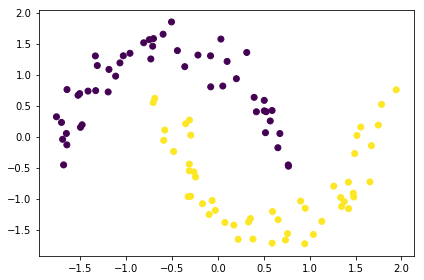

In [3]:
from sklearn.datasets import make_moons, make_circles
from sklearn.preprocessing import StandardScaler

name = 'moon'

if name == 'moon':
    x, y = make_moons(noise=.1, random_state=0, shuffle=False)
    y[y == 0] = -1
    x = StandardScaler().fit_transform(x)
elif name == 'circles':
    x, y = make_circles(shuffle=False, factor=.15, noise=.25)
    y[y == 0] = -1
else:
    x0 = np.random.randn(10, 2) + [1,1]
    x1 = np.random.randn(10, 2) - [1,1]
    y0 = -1 * np.ones(x0.shape[0])
    y1 = np.ones(x1.shape[0])
    x = np.vstack((x0, x1))
    y = np.append(y0, y1)
    
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.tight_layout()

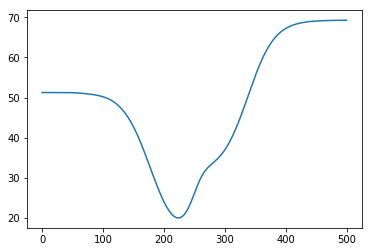

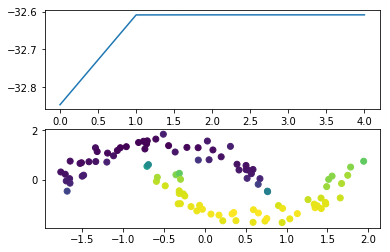

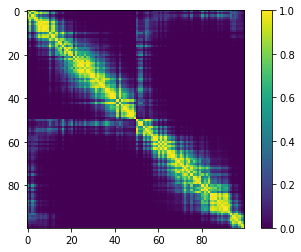

In [4]:
# Fit a GPC over a range of hyperparameter values
from gp_regression import sqe as sqe_base
import gp_classification as gp
import importlib; importlib.reload(gp);
    
def cross_entropy(p, y):
    return -np.sum(np.log(p[y == 1]) + np.log(1 - p[y != 1]))

def plot_rtn(gpc):
    fig, axes = plt.subplots(2,1)
    axes[0].plot(gpc._obj_history)
    axes[1].scatter(gpc.x[:, 0], gpc.x[:, 1], c=(1 / (1 + np.exp(-gpc.qmean))))
    plt.show()
    plt.imshow(gpc.K, vmin=0, vmax=1)
    plt.colorbar()
    plt.show()
    
models = list()
for l in np.logspace(-5, 5, 500):
    gpc = gp.GPLaplace(l)
    gpc.observe(x, y)
    models.append(gpc)

ce_losses = [cross_entropy(1 / (1 + np.exp(-gpc.qmean)), gpc.y) for gpc in models]
plt.plot(ce_losses)
indx = np.argmin(ce_losses)
plot_rtn(models[indx])
indx
plt.tight_layout()

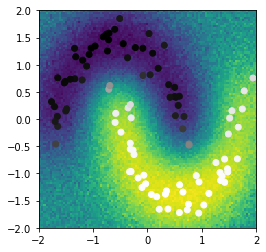

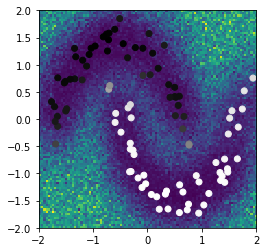

In [9]:
# Take the model that explained the data the best
# Visualize decision & uncertantity landscapes

gpc = models[np.argmin(ce_losses)]
rng = np.ceil(np.max(np.abs(gpc.x)))
pts = np.linspace(-rng,rng,100)
xg, yg = np.meshgrid(pts, pts)
mean_mesh = np.empty_like(xg)
var_mesh = np.empty_like(xg)
for i,t in enumerate(zip(xg.ravel(), yg.ravel())):
    _, predm, predv = gpc.predict(t, nsamp=1)
    z = np.random.randn(20) * predv + predm
    sigs = 1 / (1 + np.exp(-z))
    mean_mesh.ravel()[i] = np.mean(sigs)
    var_mesh.ravel()[i] = np.var(sigs)
    continue
    
plt.imshow(mean_mesh, origin='lower', extent=(-rng, rng, -rng, rng))
plt.scatter(gpc.x[:, 0], gpc.x[:, 1], c=(1 / (1 + np.exp(-gpc.qmean))), cmap='Greys_r')
plt.show()
plt.imshow(var_mesh, origin='lower', extent=(-rng, rng, -rng, rng))
plt.scatter(gpc.x[:, 0], gpc.x[:, 1], c=(1 / (1 + np.exp(-gpc.qmean))), cmap='Greys_r')


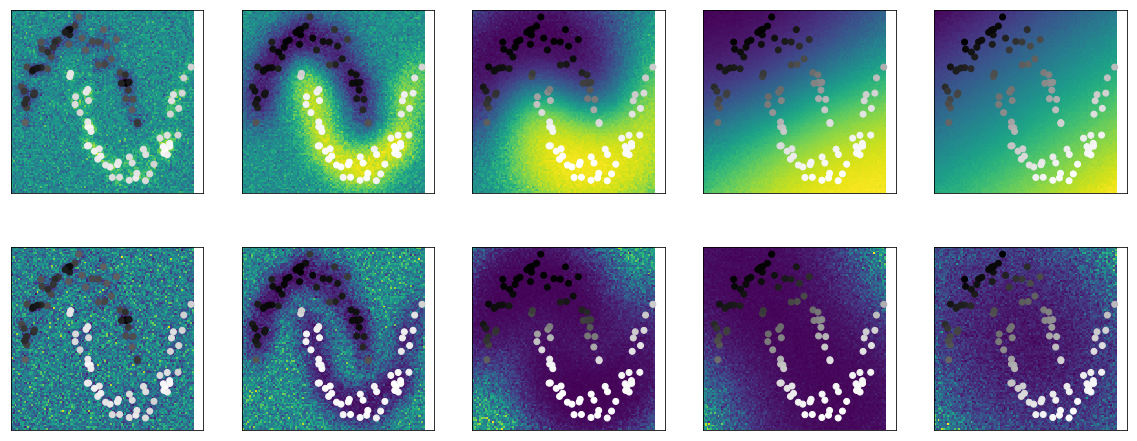

In [28]:
fig, axes = plt.subplots(2,5, subplot_kw=dict(aspect='equal', xticks=[], yticks=[]), figsize=(20,8))
for ii,indx in enumerate([150, 200, 250, 300, 350]):
    gpc = models[indx]
    rng = np.ceil(np.max(np.abs(gpc.x)))
    pts = np.linspace(-rng,rng,100)
    xg, yg = np.meshgrid(pts, pts)
    mean_mesh = np.empty_like(xg)
    var_mesh = np.empty_like(xg)
    for i,t in enumerate(zip(xg.ravel(), yg.ravel())):
        _, predm, predv = gpc.predict(t, nsamp=1)
        z = np.random.randn(20) * predv + predm
        sigs = 1 / (1 + np.exp(-z))
        mean_mesh.ravel()[i] = np.mean(sigs)
        var_mesh.ravel()[i] = np.var(sigs)
        continue
    
    axes[0][ii].imshow(mean_mesh, origin='lower', extent=(-rng, rng, -rng, rng))
    axes[0][ii].scatter(gpc.x[:, 0], gpc.x[:, 1], c=(1 / (1 + np.exp(-gpc.qmean))), cmap='Greys_r')
    axes[1][ii].imshow(var_mesh, origin='lower', extent=(-rng, rng, -rng, rng))
    axes[1][ii].scatter(gpc.x[:, 0], gpc.x[:, 1], c=(1 / (1 + np.exp(-gpc.qmean))), cmap='Greys_r')

plt.show()